# Disease Prediction Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('improved_disease_dataset.csv')
df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage)
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage)
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage)
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage)
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage)


In [ ]:
le = LabelEncoder()
df['Disease'] = le.fit_transform(df['disease'])
df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease,Disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage),29
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage),29
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage),29
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage),29
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage),29


In [ ]:
max_disease = 0
for i in range(len(df)):
  if df['Disease'][i] > max_disease:
    max_disease = df['Disease'][i]

diseases = [None] * (max_disease + 1)
for index, row in df.iterrows():
  diseases[row['Disease']] = row['disease']
diseases

['AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chronic cholestasis',
 'Dengue',
 'Diabetes',
 'Dimorphic hemorrhoids(piles)',
 'Drug Reaction',
 'GERD',
 'Gastroenteritis',
 'Heart attack',
 'Hepatitis A',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthritis',
 'Paralysis (brain hemorrhage)',
 'Peptic ulcer disease',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary tract infection',
 'Varicose veins',
 'Vertigo (Benign paroxysmal Positional Vertigo)']

# Testing Accuracies of 3 Machine Learning Models(Without Sample Remodeling) To Predict a Patients Disease Based on Their **Symptoms**

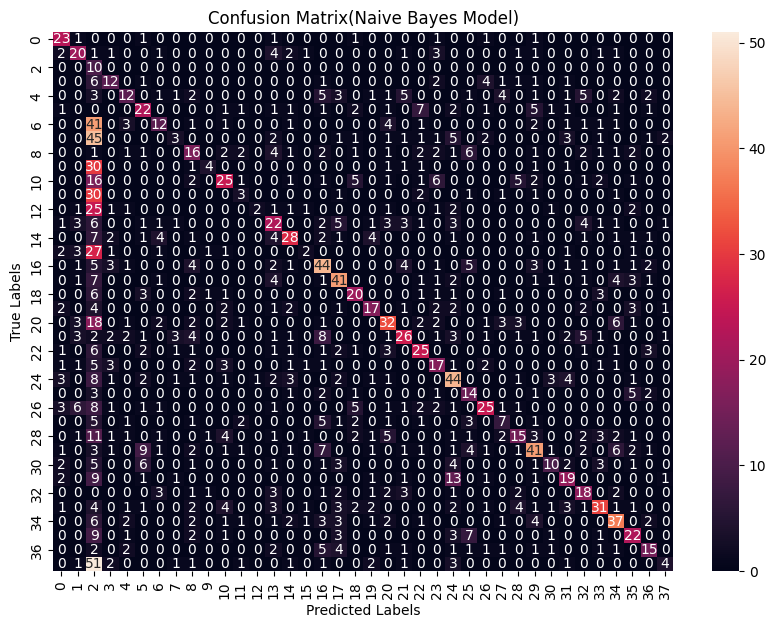

The accuracy:0.37 and confusion matrix of the the Naive Bayes model(without sample remodeling)


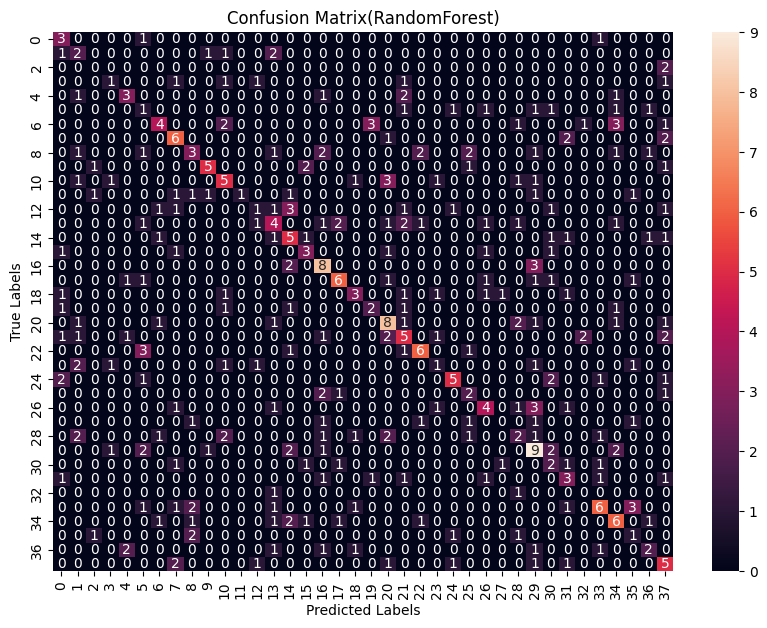

The accuracy:0.3325 and confusion matrix of the the Naive Bayes model(without sample remodeling)


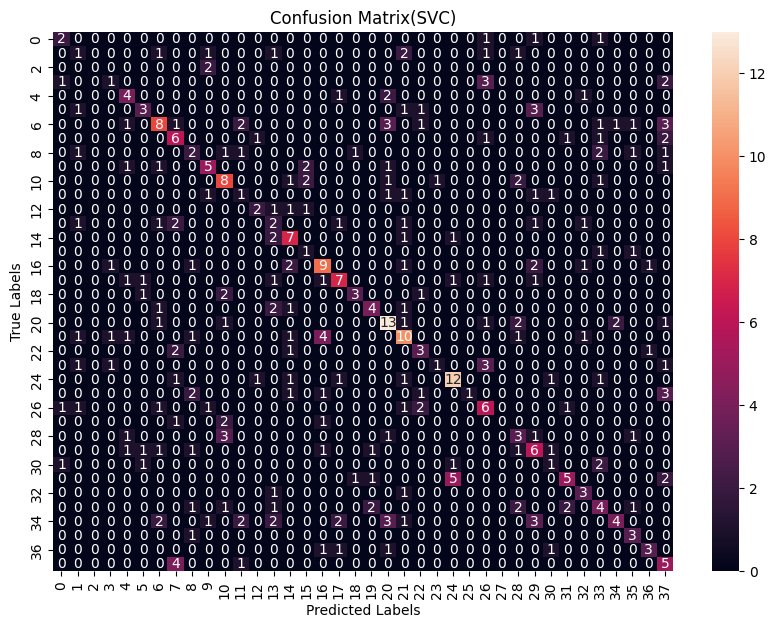

The accuracy:0.3975 and confusion matrix of the the Naive Bayes model(without sample remodeling)


In [ ]:
def RandomForest(df):
  """ Args: DataFrame with symptoms as X values and disease as Y value
      Returns: Accuracy of the model
  """
  x = df[['fever','headache','nausea','vomiting','fatigue','joint_pain','skin_rash','cough','weight_loss','yellow_eyes']]
  y = df['Disease']
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(10, 7))
  sns.heatmap(matrix, annot=True, fmt='d',)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix(RandomForest)')
  plt.show()
  return accuracy
def Gaussian(df):
  """ Args: DataFrame with symptoms as X values and disease as Y value
      Returns: Accuracy of the model
  """
  x = df[['fever','headache','nausea','vomiting','fatigue','joint_pain','skin_rash','cough','weight_loss','yellow_eyes']]
  y = df['Disease']
  model = GaussianNB()
  model.fit(x,y)
  y_pred = model.predict(x)
  accuracy = accuracy_score(y,y_pred)
  matrix = confusion_matrix(y, y_pred)
  plt.figure(figsize=(10, 7))
  sns.heatmap(matrix, annot=True, fmt='d',)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix(Naive Bayes Model)')
  plt.show()
  return accuracy
def Support_Vector_Classifier(df):
  """ Args: DataFrame with symptoms as X values and disease as Y value
      Returns: Accuracy of the model
  """
  x = df[['fever','headache','nausea','vomiting','fatigue','joint_pain','skin_rash','cough','weight_loss','yellow_eyes']]
  y = df['Disease']
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
  model = SVC()
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(10, 7))
  sns.heatmap(matrix, annot=True, fmt='d',)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix(SVC)')
  plt.show()
  return accuracy
print(f'The accuracy:{Gaussian(df)} and confusion matrix of the the Naive Bayes model(without sample remodeling)')
print(f'The accuracy:{RandomForest(df)} and confusion matrix of the the Naive Bayes model(without sample remodeling)')
print(f'The accuracy:{Support_Vector_Classifier(df)} and confusion matrix of the the Naive Bayes model(without sample remodeling)')


# Retesting the 3 Machine Learning Models with Sample Remodeling to Ensure Higher Accuracy

In [ ]:
X = df.iloc[:, :-2] # Make the x values all the symptoms(all columns except for the last two)
y = df.iloc[:, -1] # Make the y value only the last column(The numeric equivalent of the disease column)
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y) # Make sure all the diseases have the same number of samples to ensure the machine learning model is more accurate
svm_model = SVC()
svm_model.fit(X_resampled, y_resampled)
svm_preds = svm_model.predict(X_resampled)
print(f"SVM Accuracy(With Remodeling): {accuracy_score(y_resampled, svm_preds) * 100:.2f}%")
nb_model = GaussianNB()
nb_model.fit(X_resampled, y_resampled)
nb_preds = nb_model.predict(X_resampled)
print(f"Naive Bayes Accuracy(With Remodeling): {accuracy_score(y_resampled, nb_preds) * 100:.2f}%")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)
rf_preds = rf_model.predict(X_resampled)
print(f"Random Forest Accuracy(With Remodeling): {accuracy_score(y_resampled, rf_preds) * 100:.2f}%")

SVM Accuracy(With Remodeling): 60.53%
Naive Bayes Accuracy(With Remodeling): 37.98%
Random Forest Accuracy(With Remodeling): 68.98%


In [ ]:
symptoms = [None] * 10 #an empty list with a length of 10 to store the users inputted symptoms
possible_symptoms = ['fever','headache','nausea','vomiting','fatigue','joint_pain','skin_rash','cough','weight_loss','yellow_eyes'] #list of the possible symptoms in the order they appear in the dataset

#for loop to ask the user for their symptoms
#stores 1 if they have it, and a 0 if they don't
for i in possible_symptoms:
  ans = input(f'Do you have {i}? (yes/no)')
  if ans == 'yes':
    symptoms[possible_symptoms.index(i)] = 1
  else:
    symptoms[possible_symptoms.index(i)] = 0

#gets 3 different predictions using 3 different models
svm_p = svm_model.predict([symptoms])
nb_p = nb_model.predict([symptoms])
rf_p = rf_model.predict([symptoms])


if svm_p == nb_p and nb_p == rf_p: #if all 3 models predict the same disease it should be correct
  print(f'You have {diseases[svm_p[0]]}')
elif svm_p == nb_p or svm_p == rf_p or nb_p == rf_p: #if 2 models predict the same disease, it is most likely the true disease, but there is a chance it is what the third model predicted
  if svm_p == nb_p:
    print(f'You most likely have {diseases[svm_p[0]]}, but it could also be {diseases[rf_p]}')
  elif svm_p == rf_p:
    print(f'You most likely have {diseases[svm_p[0]]}, but it could also be {diseases[nb_p]}')
  elif nb_p == rf_p:
    print(f'You most likely have {diseases[nb_p[0]]}, but it could also be {diseases[svm_p]}')
else: #if all 3 models predict different disease, there are 3 different possible diseases, however the random forest model has the highest accuracy
  print(f'You most likely have {diseases[rf_p[0]]}, but it could also be {diseases[nb_p[0]]}, or {diseases[svm_p[0]]}')

Do you have fever? (yes/no)yes
Do you have headache? (yes/no)no
Do you have nausea? (yes/no)no
Do you have vomiting? (yes/no)no
Do you have fatigue? (yes/no)no
Do you have joint_pain? (yes/no)yes
Do you have skin_rash? (yes/no)no
Do you have cough? (yes/no)no
Do you have weight_loss? (yes/no)yes
Do you have yellow_eyes? (yes/no)no
You most likely have Hepatitis E, GERD, or Psoriasis


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
